In [1]:
import pandas as pd                 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt     
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


Read csv files as panda data frames and print out the dimensions

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
print("Dimensions of training data: {}".format(training_set.shape))
print("Dimensions of testing data: {}".format(test_set.shape))

Dimensions of training data: (1460, 81)
Dimensions of testing data: (1459, 80)


Drop the index and save the IDs for later; check the dimensions of the data frame afterward

In [3]:
training_set_Id = training_set.Id
training_set.drop('Id',axis=1,inplace=True)


test_set_Id = test_set.Id
test_set.drop('Id',axis=1,inplace=True)

print(training_set_Id.head())
print(test_set_Id.head())
print("Dimensions of training data after dropping ID: {}".format(training_set.shape))
print("Dimensions of test data after dropping ID: {}".format(test_set.shape))

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64
0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64
Dimensions of training data after dropping ID: (1460, 80)
Dimensions of test data after dropping ID: (1459, 79)


Describe training data

In [4]:
training_set.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#sorted(training_set.columns)

Fish out numerical variables

In [5]:
numerical_features = training_set.select_dtypes(include=[np.number])
print(numerical_features.dtypes,'\n\n')
print("Initial set of numerical features: {}".format(sorted(numerical_features.columns)))

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object 


Initial set of numerical features: ['1stFlrSF', '2ndFlrSF'

It's possible that a feature with numerical characteristics can can be categorical. My approach was to plot all the graphs of the features from the previous cell and fish out the categorical ones.

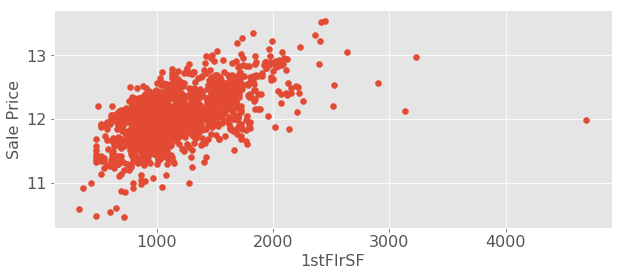

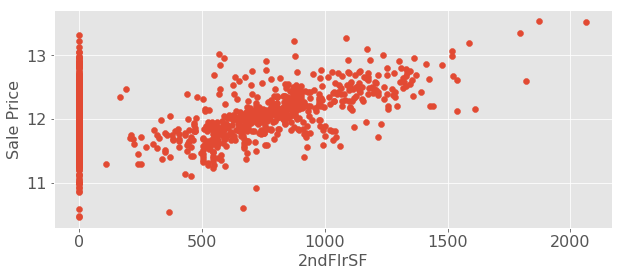

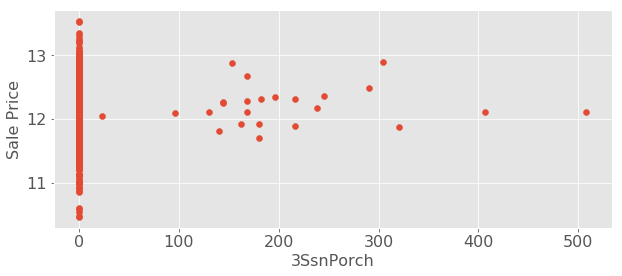

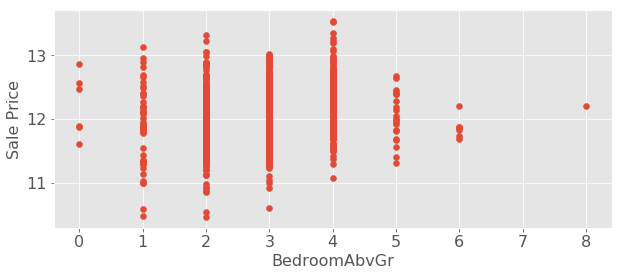

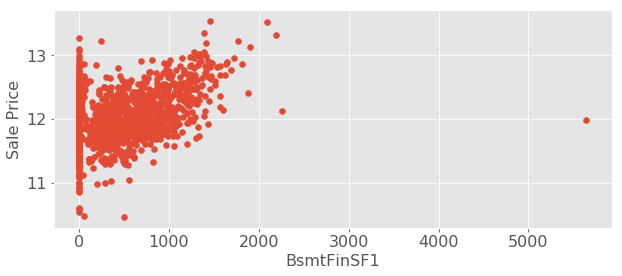

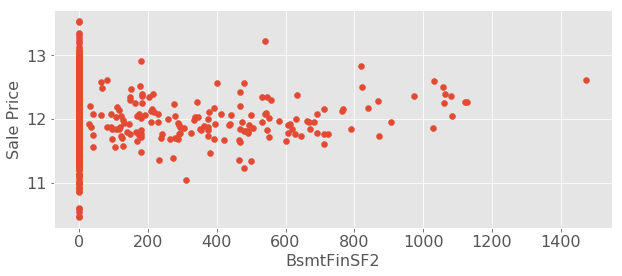

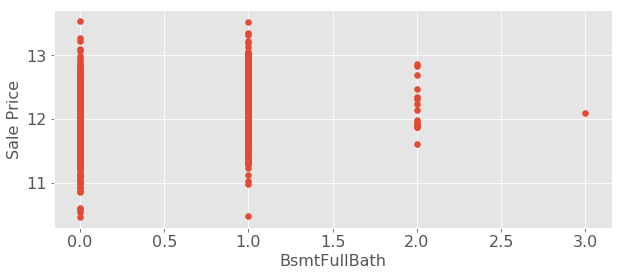

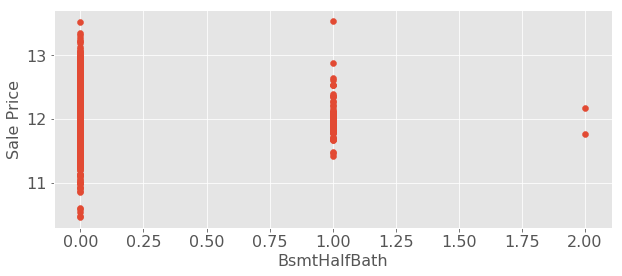

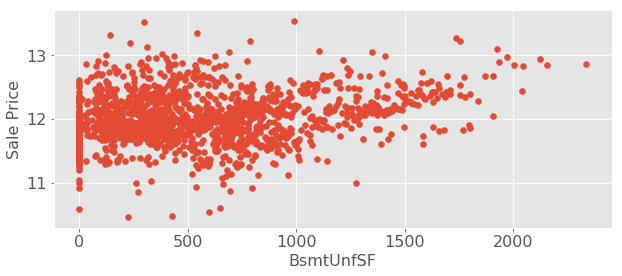

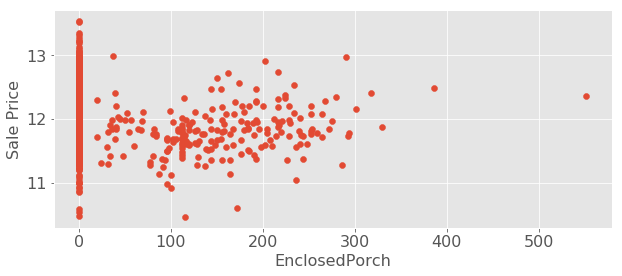

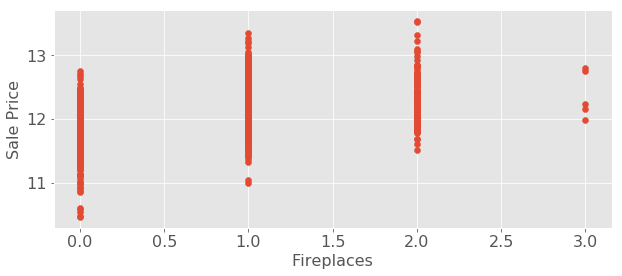

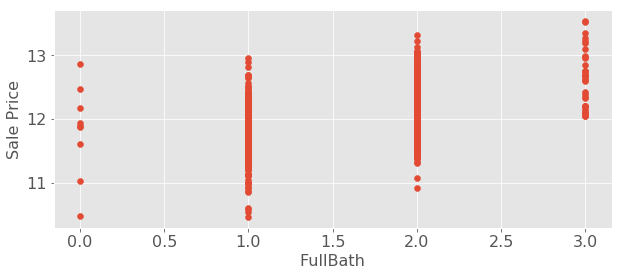

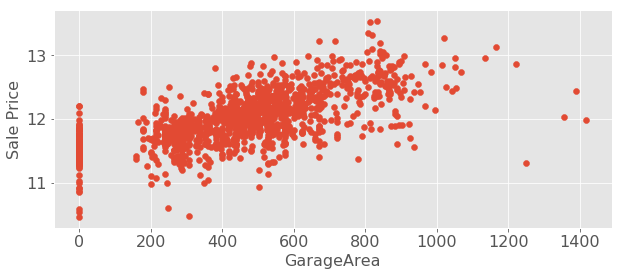

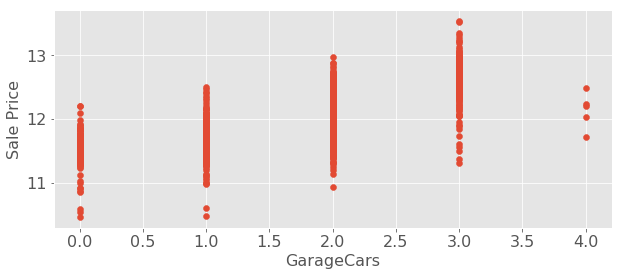

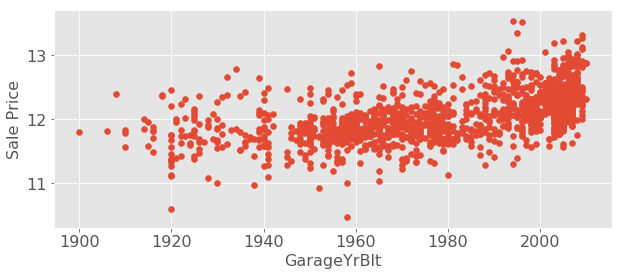

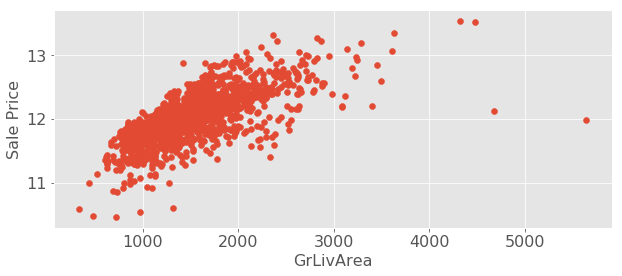

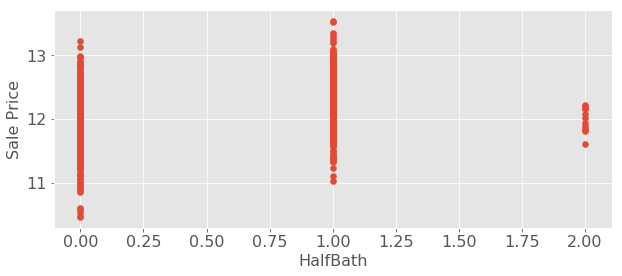

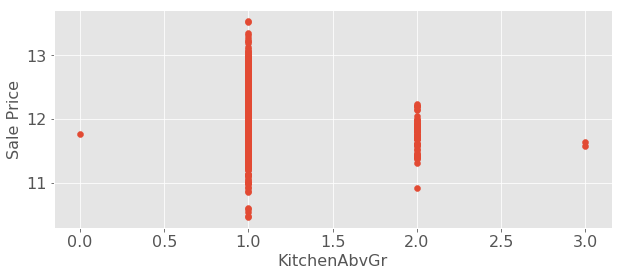

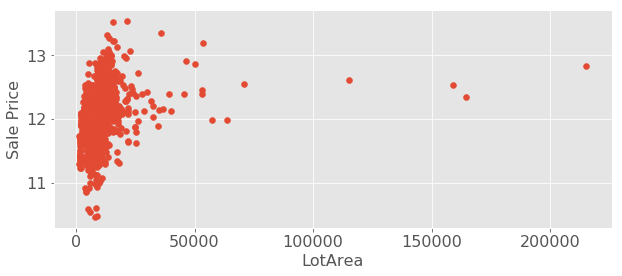

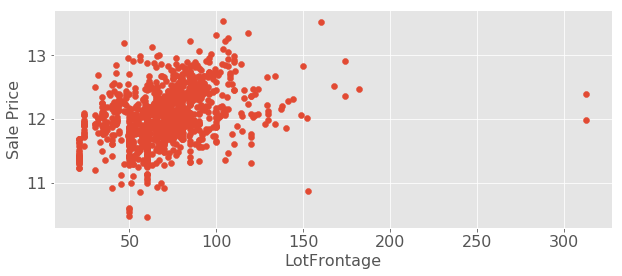

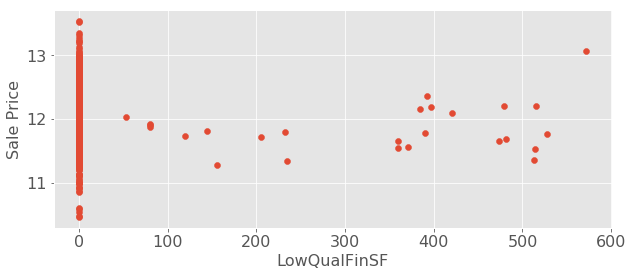

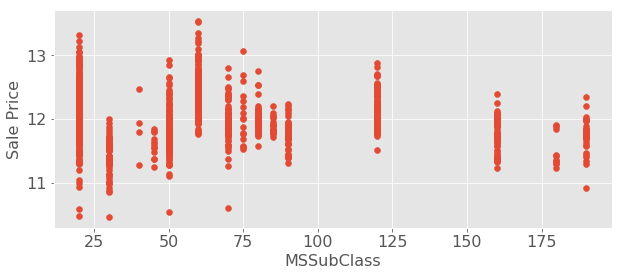

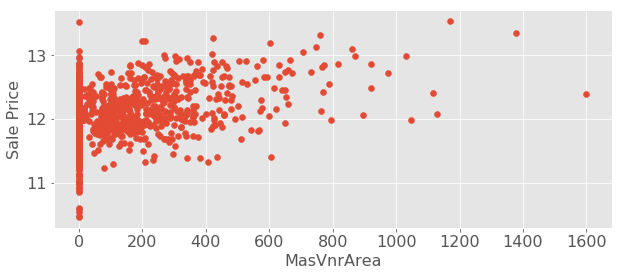

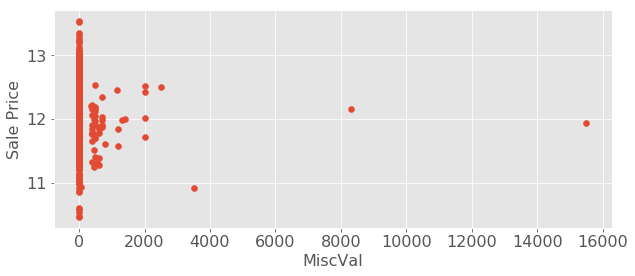

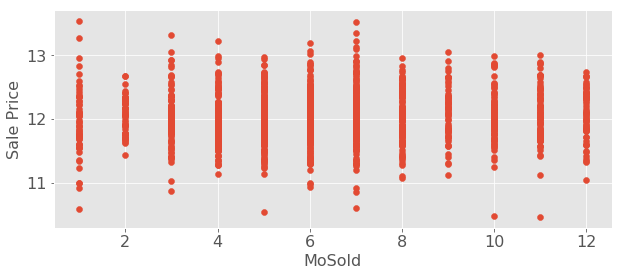

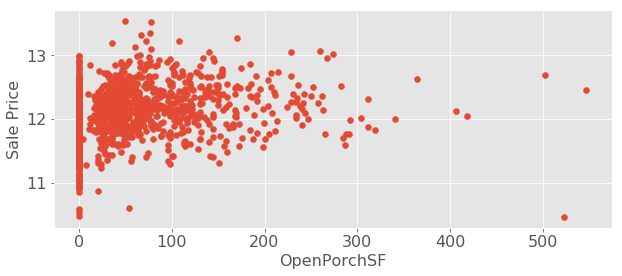

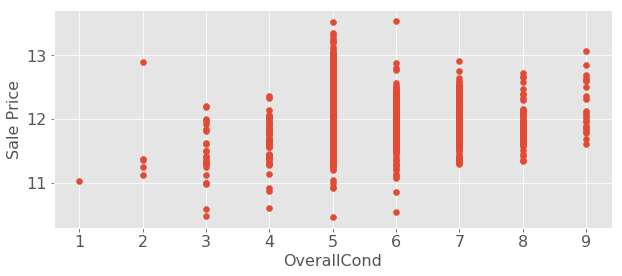

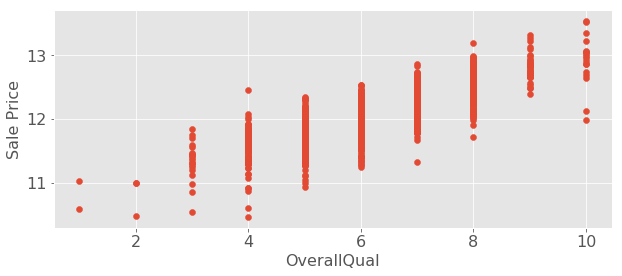

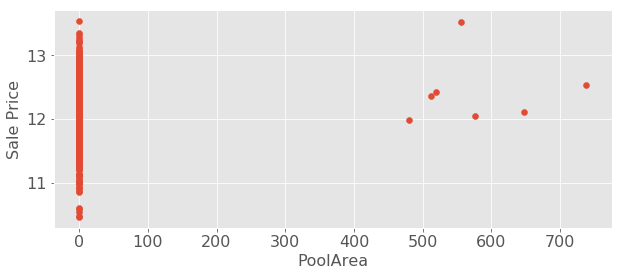

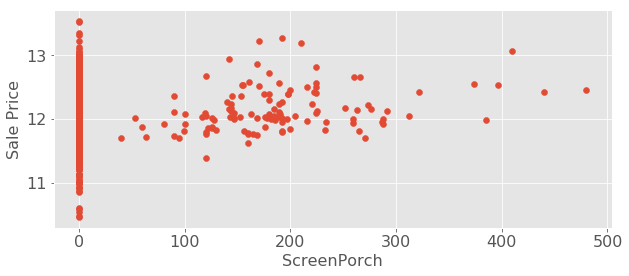

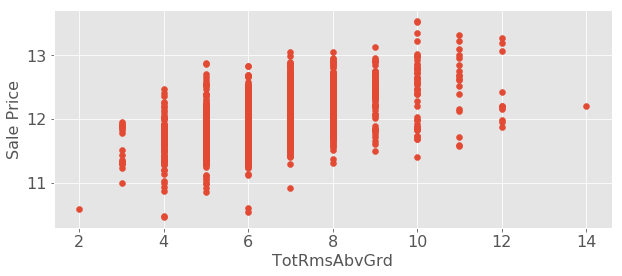

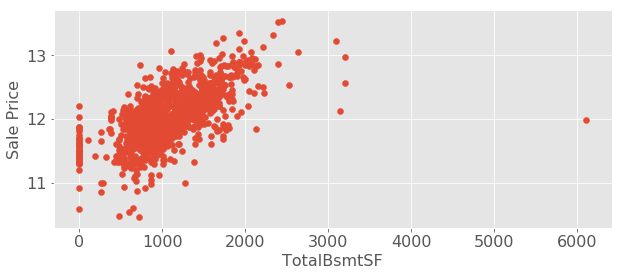

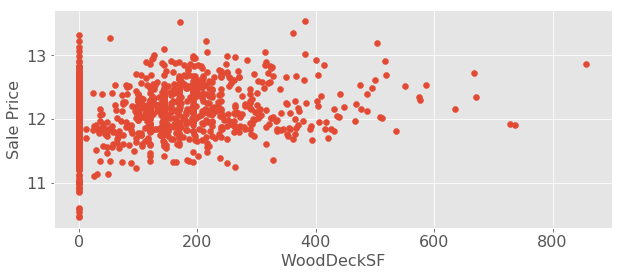

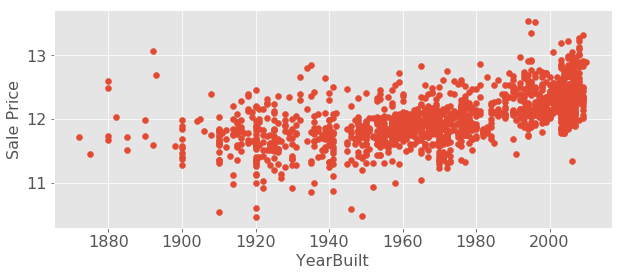

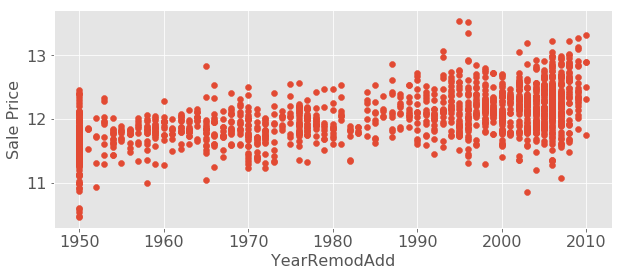

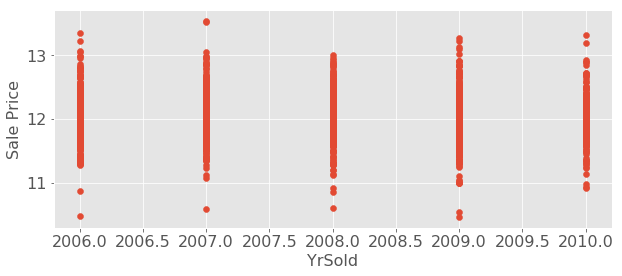

In [6]:
for i in sorted(list(numerical_features.columns)):
    if i != "SalePrice":
        plt.rcParams['figure.figsize']=(10,4)
        plt.style.use(style='ggplot')
        plt.scatter(x=training_set[i], y=np.log(training_set["SalePrice"]))
        plt.ylabel('Sale Price',fontsize=16)
        plt.xlabel(i,fontsize=16)
        plt.tick_params(labelsize=16)
        plt.show()


Final category for features after graph inspection

In [7]:
numerical_features=['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1',
                    'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 
                    'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 
                    'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 
                    'MoSold', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 
                    'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']

categorical_features=['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtFinType1',
                      'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
                      'CentralAir', 'Condition1', 'Condition2', 
                      'Electrical', 'Exterior1st', 'Exterior2nd', 
                      'Fence', 'Fireplaces', 'Foundation', 'FullBath', 
                      'Functional', 'GarageCars', 'GarageFinish', 
                      'GarageType', 'HalfBath', 'Heating', 'HouseStyle', 
                      'KitchenAbvGr', 'LandContour', 'LandSlope', 'LotConfig',
                      'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
                      'MiscFeature', 'Neighborhood', 'OverallCond', 
                      'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle',
                      'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd', 
                      'Utilities', 'YrSold', 'BsmtCond', 'BsmtExposure', 
                      'BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 
                      'GarageCond', 'GarageQual', 'HeatingQC', 'KitchenQual', 
                      'PoolQC']


In [8]:
print(len(numerical_features))
print(len(categorical_features))

23
56


find the features with 40% or more of missing data

In [9]:
def check_var(i):
    if i in numerical_features: return('numerical')
    if i in categorical_features: return('categorical')
    
training_set_missing = training_set.isnull().sum()
training_set_missing.sort_values(axis=0,ascending=False,inplace=True)
number_of_rows=training_set.shape[0]
#print(training_set_missing*100/number_of_rows)
#print(training_set_missing.index)
#print(training_set_missing.values)
missing_types=[check_var(i) for i in training_set_missing.index]
headers=[tuple(training_set[i].head(n=5)) for i in training_set_missing.index]
tmp1 = pd.DataFrame({'Feature':training_set_missing.index, 
                    'Missing values':training_set_missing.values})
tmp1['Feature type']=pd.Series(missing_types, index=tmp1.index)
tmp1['Percentage missing']=pd.Series(training_set_missing.values*100/number_of_rows, index=tmp1.index)
tmp1['First 5 values']=pd.Series(headers, index=tmp1.index)
tmp1.head(n=30)

,Feature,Missing values,Feature type,Percentage missing,First 5 values
0,PoolQC,1453,categorical,99.520548,"(nan, nan, nan, nan, nan)"
1,MiscFeature,1406,categorical,96.301370,"(nan, nan, nan, nan, nan)"
2,Alley,1369,categorical,93.767123,"(nan, nan, nan, nan, nan)"
3,Fence,1179,categorical,80.753425,"(nan, nan, nan, nan, nan)"
4,FireplaceQu,690,categorical,47.260274,"(nan, TA, TA, Gd, TA)"
5,LotFrontage,259,numerical,17.739726,"(65.0, 80.0, 68.0, 60.0, 84.0)"
6,GarageType,81,categorical,5.547945,"(Attchd, Attchd, Attchd, Detchd, Attchd)"
7,GarageCond,81,categorical,5.547945,"(TA, TA, TA, TA, TA)"
8,GarageFinish,81,categorical,5.547945,"(RFn, RFn, RFn, Unf, RFn)"
9,GarageQual,81,categorical,5.547945,"(TA, TA, TA, TA, TA)"


Drop features missing 40% or more of data and imputate remaining missing values

In [10]:
numerical_imputation = list(tmp1[(tmp1['Feature type']=='numerical') & (tmp1['Percentage missing']>0) 
                            & (tmp1['Percentage missing']<=40)].Feature) 
print(numerical_imputation)

for i in numerical_imputation:
    training_set[i].fillna(training_set[i].mean(), inplace=True)
#    print('Null values left for {} is: {:d}'.format(i, training_set[i].isnull().sum()))
    

categorical_imputation = list(tmp1[(tmp1['Feature type']=='categorical') & (tmp1['Percentage missing']>0) 
                            & (tmp1['Percentage missing']<=40)].Feature)
print(categorical_imputation)

for i in categorical_imputation:
    training_set[i].fillna(training_set[i].mode()[0], inplace=True)
#    print('Null values left for {} is: {:d}'.format(i, training_set[i].isnull().sum()))

drop_features=list(tmp1[tmp1['Percentage missing']>40].Feature) 
print(drop_features)
training_set.drop(drop_features,axis=1,inplace=True)
print(training_set.shape)

for i in  drop_features:
    if i in numerical_features:
        numerical_features.remove(i)
    else:
        categorical_features.remove(i)
                  
for i in numerical_features:
   training_set = training_set[np.abs(training_set[i]-training_set[i].mean()) <= (3*training_set[i].std())]  
training_set.shape

#for i in sorted(list(numerical_features)):
#    if i != "SalePrice":
#        plt.rcParams['figure.figsize']=(10,4)
#        plt.style.use(style='ggplot')
#        plt.scatter(x=training_set[i], y=np.log(training_set["SalePrice"]))
#        plt.ylabel('Sale Price',fontsize=16)
#        plt.xlabel(i,fontsize=16)
#        plt.tick_params(labelsize=16)
#        plt.show()

for i in  categorical_features:
    training_set[i] = LabelEncoder().fit_transform(training_set[i])
training_set.shape


['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
(1460, 75)


(1141, 75)

Now deal with test dataset; determine features with the most missing values 

In [11]:
test_set_missing = test_set.isnull().sum()
test_set_missing.sort_values(axis=0,ascending=False,inplace=True)
number_of_rows=test_set.shape[0]
#print(test_set_missing*100/number_of_rows)
#print(test_set_missing.index)
#print(test_set_missing.values)
missing_types=[check_var(i) for i in test_set_missing.index]
headers=[tuple(test_set[i].head(n=5)) for i in test_set_missing.index]
tmp2 = pd.DataFrame({'Feature':test_set_missing.index, 
                    'Missing values':test_set_missing.values})
tmp2['Feature type']=pd.Series(missing_types, index=tmp2.index)
tmp2['Percentage missing']=pd.Series(test_set_missing.values*100/number_of_rows, index=tmp2.index)
tmp2['First few lines']=pd.Series(headers, index=tmp2.index)
tmp2.head(n=30)

,Feature,Missing values,Feature type,Percentage missing,First few lines
0,PoolQC,1456,None,99.794380,"(nan, nan, nan, nan, nan)"
1,MiscFeature,1408,None,96.504455,"(nan, Gar2, nan, nan, nan)"
2,Alley,1352,None,92.666210,"(nan, nan, nan, nan, nan)"
3,Fence,1169,None,80.123372,"(MnPrv, nan, MnPrv, nan, nan)"
4,FireplaceQu,730,None,50.034270,"(nan, nan, TA, Gd, nan)"
5,LotFrontage,227,numerical,15.558602,"(80.0, 81.0, 74.0, 78.0, 43.0)"
6,GarageCond,78,categorical,5.346127,"(TA, TA, TA, TA, TA)"
7,GarageFinish,78,categorical,5.346127,"(Unf, Unf, Fin, Fin, RFn)"
8,GarageYrBlt,78,numerical,5.346127,"(1961.0, 1958.0, 1997.0, 1998.0, 1992.0)"
9,GarageQual,78,categorical,5.346127,"(TA, TA, TA, TA, TA)"


Drop test dataset features missing 40% or more of data and imputate remaining missing values

In [12]:
numerical_imputation = list(tmp2[(tmp2['Feature type']=='numerical') & (tmp2['Percentage missing']>0) 
                            & (tmp2['Percentage missing']<40)].Feature) 
print(numerical_imputation)

for i in numerical_imputation:
    test_set[i].fillna(test_set[i].mean(), inplace=True)
#    print('Null values left for {} is: {:d}'.format(i, training_set[i].isnull().sum()))
    

categorical_imputation = list(tmp2[(tmp2['Feature type']=='categorical') & (tmp2['Percentage missing']>0)
                            & (tmp2['Percentage missing']<40)].Feature)
print(categorical_imputation)

for i in categorical_imputation:
    test_set[i].fillna(test_set[i].mode()[0], inplace=True)
#    print('Null values left for {} is: {:d}'.format(i, test_set[i].isnull().sum()))

drop_features=list(tmp2[tmp2['Percentage missing']>40].Feature)
print(drop_features)
test_set.drop(drop_features,axis=1,inplace=True)
print(test_set.shape)

#for i in numerical_features:
#    test_set = test_set[np.abs(test_set[i]-test_set[i].mean()) <= (3*test_set[i].std())]  
#test_set.shape

for i in  categorical_features:
    test_set[i] = LabelEncoder().fit_transform(test_set[i])
test_set.shape

['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']
['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'BsmtHalfBath', 'Utilities', 'Functional', 'BsmtFullBath', 'Exterior2nd', 'SaleType', 'Exterior1st', 'KitchenQual', 'GarageCars']
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
(1459, 74)


(1459, 74)

Examine response variable for skewness and transform if necessary

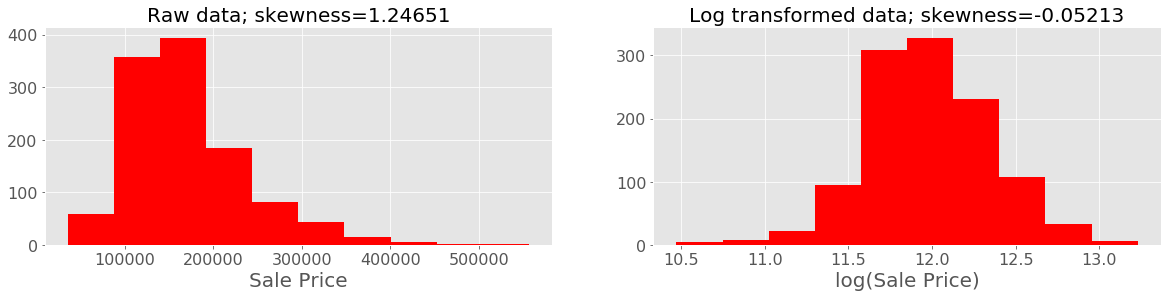

In [13]:
plt.rcParams['figure.figsize']=(20,4)
plt.style.use(style='ggplot')
xxx,sub=plt.subplots(1,2)
sub[0].hist(training_set.SalePrice, color='red')
#sub[0].set_title('Raw data skewness={}'.format(training_set.SalePrice.skew()))
sub[0].set_title('Raw data; skewness=%.5f'%(training_set.SalePrice.skew()),fontsize=20)
sub[0].set_xlabel('Sale Price',fontsize=20)
sub[0].tick_params(labelsize=16)
#sub[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))


sub[1].hist(np.log(training_set.SalePrice), color='red')
sub[1].set_title('Log transformed data; skewness=%.5f'%(np.log1p(training_set.SalePrice).skew()),fontsize=20)
sub[1].set_xlabel('log(Sale Price)',fontsize=20)
sub[1].tick_params(labelsize=16)

# to plot a histogram of SalePrice
#print ("Skew is:", training_set.SalePrice.skew())
#plt.subplot(1,2,1)
#plt.hist(training_set.SalePrice, color='red')


# use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data
#target = np.log1p(training_set.SalePrice)
#print ("\n Skew is:", target.skew())
#plt.hist(target, color='red')
plt.show()


Check the correlation between the features and response variable (SalePrice) 

In [14]:
correlation_matrix = training_set.corr()
print (correlation_matrix['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (correlation_matrix['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.814011
GrLivArea      0.715517
GarageCars     0.654331
GarageArea     0.642533
Name: SalePrice, dtype: float64 

KitchenQual   -0.584850
ExterQual     -0.637779
BsmtQual      -0.640411
Utilities           NaN
PoolArea            NaN
Name: SalePrice, dtype: float64


Drop the "Utilities" and "PoolArea" features

In [15]:
training_set.drop("Utilities",axis=1,inplace=True)
test_set.drop("Utilities",axis=1,inplace=True)
training_set.drop("PoolArea",axis=1,inplace=True)
test_set.drop("PoolArea",axis=1,inplace=True)

We are now ready to train the data and make predictions

In [18]:
print(training_set.shape)
print(test_set.shape)

(1141, 73)
(1459, 72)


Model 1: Multiple linear regression

R^2 is: 
 0.9179241360831897
RMSE is: 
 0.009988266492485754


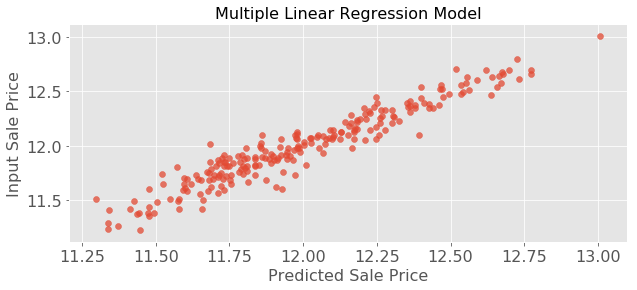

     Id      SalePrice
0  1461  123128.318430
1  1462  127751.087493
2  1463  178772.469426
3  1464  198353.911202
4  1465  192934.257323


In [16]:
y = np.log(training_set.SalePrice)
#X = data.drop(['SalePrice', 'Id'], axis=1)
X = training_set.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)
lr = linear_model.LinearRegression()
# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)



# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

# calculates the rmse
print('RMSE is: \n', mean_squared_error(y_test, predictions))

# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test

plt.rcParams['figure.figsize']=(10,4)
plt.style.use(style='ggplot')
plt.scatter(x=predictions, y=actual_values, alpha=.75)
plt.ylabel('Input Sale Price',fontsize=16)
plt.xlabel('Predicted Sale Price',fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Multiple Linear Regression Model',fontsize=16)
plt.show()

# create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
# The first column must the contain the ID from the test data.
submission['Id'] = test_set_Id

# select the features from the test data for the model as we did above.
#feats = test.select_dtypes(
#    include=[np.number]).drop(['Id'], axis=1).interpolate()

# generate predictions
predictions = model.predict(test_set.interpolate())

# transform the predictions to the correct form
# apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)


# check the difference
#print("Original predictions are: \n", predictions[:10], "\n")
#print("Final predictions are: \n", final_predictions[:10])

# assign these predictions and check
submission['SalePrice'] = final_predictions
# submission.head()
print(submission.head())

# export to a .csv file as Kaggle expects.
# pass index=False because Pandas otherwise would create a new index for us.
submission.to_csv('submission1.csv', index=False)


Model 2: Lasso Regression (not fine-tuned; sort of zeroth order approximation)

In [17]:
alphas = np.logspace(-10,-0.5,num=50)
y = np.log(training_set.SalePrice)
#X = data.drop(['SalePrice', 'Id'], axis=1)
X = training_set.drop(['SalePrice'], axis=1)
lasso = linear_model.LassoCV(alphas=alphas, tol=0.00005, selection='random', random_state=13, max_iter=1000)
lasso.fit(X,y)
print("Best alpha is",lasso.alpha_)
lasso.pred = lasso.predict(X)
print("Competition training RMSE:", np.sqrt(np.sum(lasso.pred - y)**2))
sollasso = pd.DataFrame({'Id':test_set_Id, 'SalePrice':np.exp(lasso.predict(test_set))})
sollasso.to_csv('submission2.csv', index=False)

Best alpha is 0.0003906939937054613
Competition training RMSE: 1.021405182655144e-12


/home/attafynn/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/attafynn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/attafynn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/attafynn/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did 

Model 3: Random Forest Regression [sort of crude; not fine-tuned]

In [18]:
y = np.log(training_set.SalePrice)
#X = data.drop(['SalePrice', 'Id'], axis=1)
X = training_set.drop(['SalePrice'], axis=1)
rf_all = RandomForestRegressor(n_jobs=-1, n_estimators=3000, max_depth=20, random_state=13)
rf_all.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

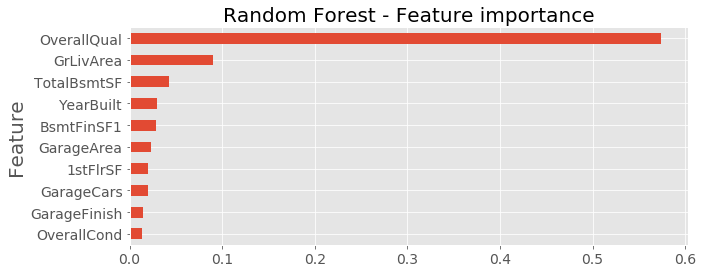

In [42]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':rf_all.feature_importances_})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances[0:10].iloc[::-1].plot(kind='barh',legend=False,fontsize=16)
plt.tick_params(labelsize=14)
plt.ylabel("Feature",fontsize=20)
plt.title("Random Forest - Feature importance",fontsize=20)
plt.show()

In [19]:
preds = np.exp(rf_all.predict(test_set))
solrf = pd.DataFrame({'Id':test_set_Id, 'SalePrice':preds})
solrf.to_csv("submission3.csv", index=False)

Model 4: XGBoost Regression (not fine-tuned either)

/home/attafynn/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:34:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


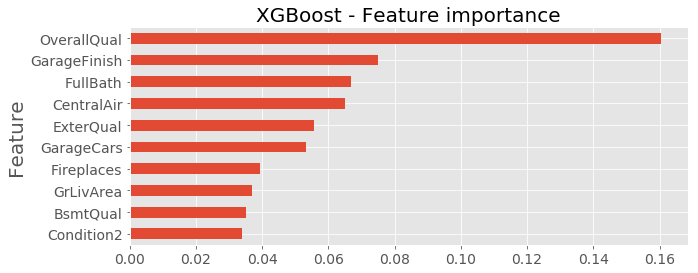

In [23]:
y = np.log(training_set.SalePrice)
#X = data.drop(['SalePrice', 'Id'], axis=1)
X = training_set.drop(['SalePrice'], axis=1)
gbm = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=13).fit(X,y)


xgb_preds = np.exp(gbm.predict(test_set))
solxgb = pd.DataFrame({'Id':test_set_Id, 'SalePrice':xgb_preds})
solxgb.to_csv("submission4.csv", index=False)
solxgb.head(3)
importances = pd.DataFrame({'Feature':X.columns, 'Importance':gbm.feature_importances_})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances[0:10].iloc[::-1].plot(kind='barh',legend=False)
plt.title("XGBoost - Feature importance",fontsize=20)
plt.tick_params(labelsize=14)
plt.ylabel("Feature",fontsize=20)
plt.show()


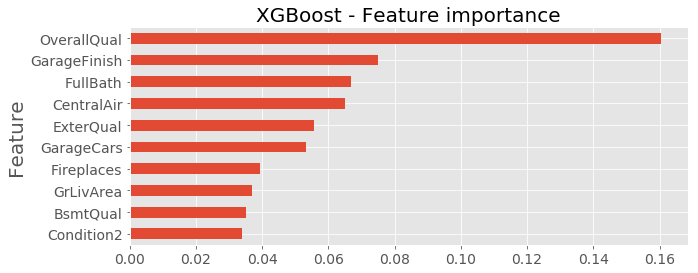